<h1 style="background-color:skyblue; color:darkblue; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  PREDICTIVE MODELING
</h1>


<h1 style="background-color:darkblue; color:skyblue; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 4px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 5px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  Super Market Sales
</h1>


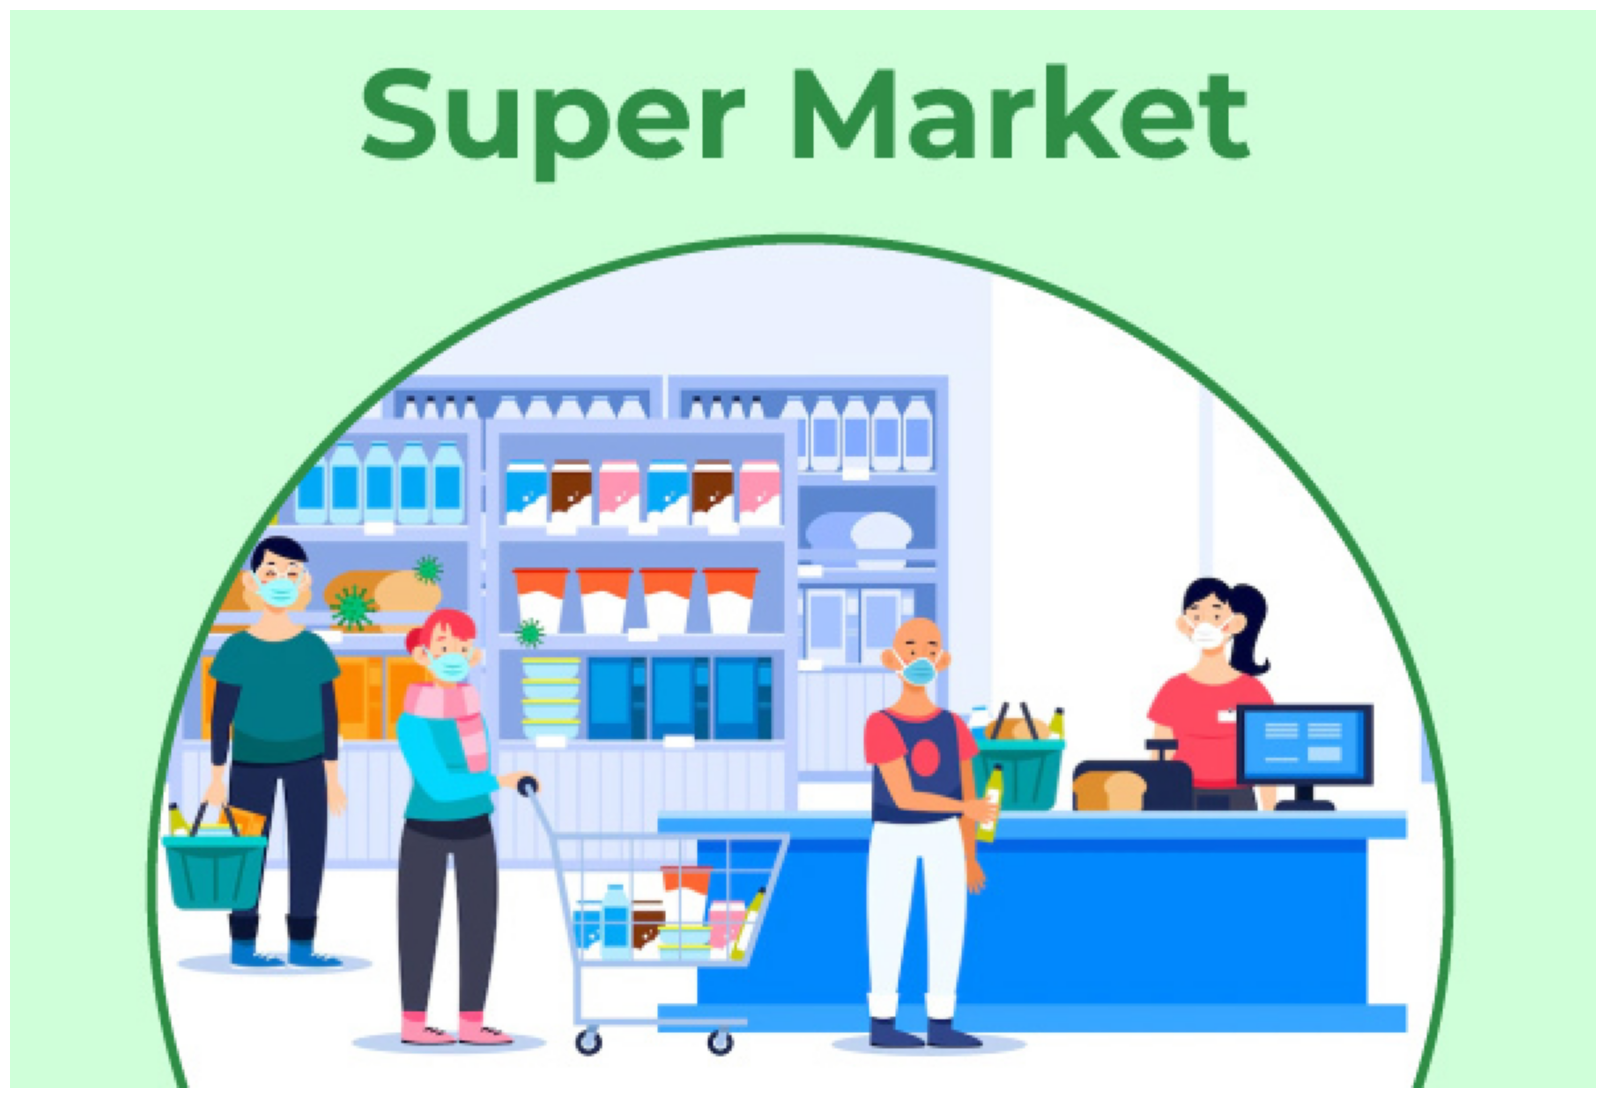

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(r"C:\Users\GCE\Pictures\Super-Market.jpg")
plt.figure(figsize=(22, 14))   # Bigger = larger image
plt.imshow(img)
plt.axis('off')
plt.show()

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
  Importing Libraries
</h1>


In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import lightgbm as lgbmodel 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from tabulate import tabulate

In [102]:
sales=pd.read_csv(r"C:\Users\GCE\Downloads\Supermarket Sales 2.csv")
sales.head()

,Date,Branch,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating
0,1/1/2024,Brooklyn,Member,Female,Food & Beverages,84.63,10,Credit card,9.0
1,1/1/2024,Queens,Normal,Female,Electronics,63.22,2,Cash,8.5
2,1/1/2024,Brooklyn,Normal,Female,Electronics,74.71,6,Cash,6.7
3,1/1/2024,Queens,Member,Female,Sports & Travel,36.98,10,Credit card,7.0
4,1/1/2024,Manhattan,Member,Female,Sports & Travel,27.04,4,Ewallet,6.9


In [103]:
sales.shape

(5053, 9)

In [104]:
sales.columns

Index(['Date', 'Branch', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Payment', 'Rating'],
      dtype='object')

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5053 non-null   object 
 1   Branch         5053 non-null   object 
 2   Customer type  5053 non-null   object 
 3   Gender         5053 non-null   object 
 4   Product line   5053 non-null   object 
 5   Unit price     5053 non-null   float64
 6   Quantity       5053 non-null   int64  
 7   Payment        5053 non-null   object 
 8   Rating         5053 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 355.4+ KB


In [7]:
sales.describe(include='all')

,Date,Branch,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating
count,5053,5053,5053,5053,5053,5053.000000,5053.000000,5053,5053.000000
unique,365,3,2,2,6,NaN,NaN,3,NaN
top,4/5/2024,Brooklyn,Normal,Female,Food & Beverages,NaN,NaN,Ewallet,NaN
freq,28,1793,2968,2603,1670,NaN,NaN,1785,NaN
mean,NaN,NaN,NaN,NaN,NaN,39.692988,4.593509,NaN,6.884029
std,NaN,NaN,NaN,NaN,NaN,29.557474,2.787934,NaN,1.710245
min,NaN,NaN,NaN,NaN,NaN,2.010000,1.000000,NaN,3.000000
25%,NaN,NaN,NaN,NaN,NaN,11.630000,2.000000,NaN,5.600000
50%,NaN,NaN,NaN,NaN,NaN,33.900000,4.000000,NaN,7.100000
75%,NaN,NaN,NaN,NaN,NaN,64.940000,7.000000,NaN,8.200000


In [8]:
for i in sales:
    print(i)
    print(sales[i].unique())
    print(sales[i].nunique())

Date
['1/1/2024' '1/2/2024' '1/3/2024' '1/4/2024' '1/5/2024' '1/6/2024'
 '1/7/2024' '1/8/2024' '1/9/2024' '1/10/2024' '1/11/2024' '1/12/2024'
 '1/13/2024' '1/14/2024' '1/15/2024' '1/16/2024' '1/17/2024' '1/18/2024'
 '1/19/2024' '1/20/2024' '1/21/2024' '1/22/2024' '1/23/2024' '1/24/2024'
 '1/25/2024' '1/26/2024' '1/27/2024' '1/28/2024' '1/29/2024' '1/30/2024'
 '1/31/2024' '2/1/2024' '2/2/2024' '2/3/2024' '2/4/2024' '2/5/2024'
 '2/6/2024' '2/7/2024' '2/8/2024' '2/9/2024' '2/10/2024' '2/11/2024'
 '2/12/2024' '2/13/2024' '2/14/2024' '2/15/2024' '2/16/2024' '2/17/2024'
 '2/18/2024' '2/19/2024' '2/20/2024' '2/21/2024' '2/22/2024' '2/23/2024'
 '2/24/2024' '2/25/2024' '2/26/2024' '2/27/2024' '2/28/2024' '2/29/2024'
 '3/1/2024' '3/2/2024' '3/3/2024' '3/4/2024' '3/5/2024' '3/6/2024'
 '3/7/2024' '3/8/2024' '3/9/2024' '3/10/2024' '3/11/2024' '3/12/2024'
 '3/13/2024' '3/14/2024' '3/15/2024' '3/16/2024' '3/17/2024' '3/18/2024'
 '3/19/2024' '3/20/2024' '3/21/2024' '3/22/2024' '3/23/2024' '3/24/2024'


In [9]:
sales.isnull().sum()

Date             0
Branch           0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Payment          0
Rating           0
dtype: int64

In [10]:
sales.dtypes

Date              object
Branch            object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Payment           object
Rating           float64
dtype: object

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
  Visualisation
</h1>


<h1 style="background-color:white; color:darkblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
  Univariate Analysis
</h1>

### Hist plot

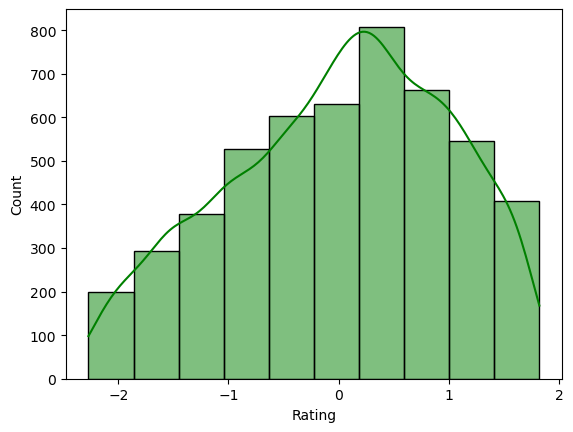

In [97]:
sns.histplot(sales['Rating'],kde=True,bins=10,color='green')
plt.show()

##### This plot shows how the 'Rating' variable is distributed. Most ratings are near the center, with a gradual decrease in frequency as ratings move further away from the middle.

<h1 style="background-color:white; color:darkblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
  Bivariate Analysis
</h1>

### bar plot

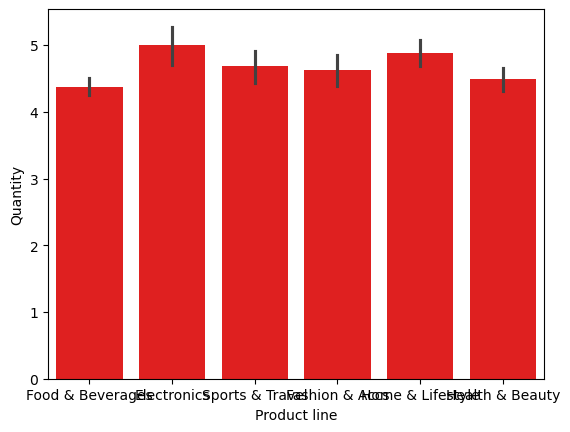

In [107]:
sns.barplot(x='Product line',y='Quantity',data=sales,color='red')
plt.show()

##### This bar plot visualizes the average quantity sold for each product line, with red bars representing the sales volume.The error bars show the variability in the quantity sold across different sales transactions, highlighting the consistency or fluctuation within each product category.

<h1 style="background-color:white; color:darkblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
  Multivariate Analysis
</h1>

### heatmap

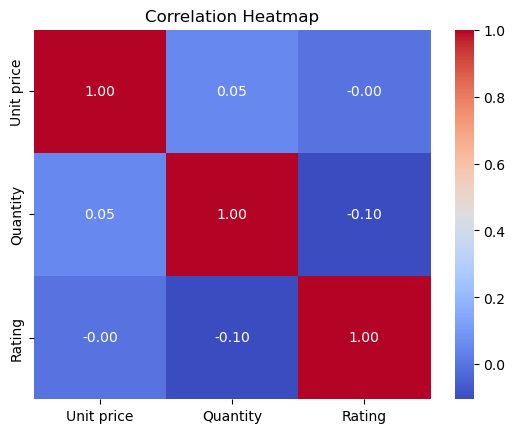

In [14]:
corr = sales[['Unit price', 'Quantity', 'Rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### The heatmap shows weak correlations between Unit price, Quantity, and Rating.

In [15]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [16]:
sales['Month'] = sales['Date'].dt.month

In [17]:
sales = sales.drop(columns=['Date'])

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
  Label Encoding
</h1>


In [18]:
le=LabelEncoder()

In [19]:
label_coles=['Branch','Customer type','Product line','Payment','Gender']
for col in label_coles:
    sales[col] = le.fit_transform(sales[col])
sales

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating,Month
0,0,0,0,2,84.63,10,1,9.0,1
1,2,1,0,0,63.22,2,0,8.5,1
2,0,1,0,0,74.71,6,0,6.7,1
3,2,0,0,5,36.98,10,1,7.0,1
4,1,0,0,5,27.04,4,2,6.9,1
...,...,...,...,...,...,...,...,...,...
5048,1,1,0,2,6.71,10,0,5.9,12
5049,0,1,1,2,6.79,9,1,4.8,12
5050,2,0,1,0,85.05,7,2,4.4,12
5051,1,0,0,5,54.64,10,1,4.8,12


<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
  Scaling 
</h1>


In [20]:
scaler=StandardScaler()

In [21]:
scaled= scaler.fit_transform(sales)

In [22]:
sales

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating,Month
0,0,0,0,2,84.63,10,1,9.0,1
1,2,1,0,0,63.22,2,0,8.5,1
2,0,1,0,0,74.71,6,0,6.7,1
3,2,0,0,5,36.98,10,1,7.0,1
4,1,0,0,5,27.04,4,2,6.9,1
...,...,...,...,...,...,...,...,...,...
5048,1,1,0,2,6.71,10,0,5.9,12
5049,0,1,1,2,6.79,9,1,4.8,12
5050,2,0,1,0,85.05,7,2,4.4,12
5051,1,0,0,5,54.64,10,1,4.8,12


In [23]:
sales=pd.DataFrame(scaled,columns=sales.columns)
sales

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating,Month
0,-1.172620,-1.193106,-0.970166,-0.346366,1.520477,1.939438,-0.026560,1.237355,-1.722715
1,1.288542,0.838149,-0.970166,-1.748760,0.796054,-0.930354,-1.235633,0.944970,-1.722715
2,-1.172620,0.838149,-0.970166,-1.748760,1.184826,0.504542,-1.235633,-0.107615,-1.722715
3,1.288542,-1.193106,-0.970166,1.757225,-0.091796,1.939438,-0.026560,0.067816,-1.722715
4,0.057961,-1.193106,-0.970166,1.757225,-0.428123,-0.212906,1.182513,0.009339,-1.722715
...,...,...,...,...,...,...,...,...,...
5048,0.057961,0.838149,-0.970166,-0.346366,-1.116004,1.939438,-1.235633,-0.575430,1.438515
5049,-1.172620,0.838149,1.030752,-0.346366,-1.113297,1.580714,-0.026560,-1.218677,1.438515
5050,1.288542,-1.193106,1.030752,-1.748760,1.534688,0.863266,1.182513,-1.452585,1.438515
5051,0.057961,-1.193106,-0.970166,1.757225,0.505743,1.939438,-0.026560,-1.218677,1.438515


<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
  Model Building 
</h1>


In [24]:
x= sales.drop(columns=['Rating'])

In [25]:
x

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Payment,Month
0,-1.172620,-1.193106,-0.970166,-0.346366,1.520477,1.939438,-0.026560,-1.722715
1,1.288542,0.838149,-0.970166,-1.748760,0.796054,-0.930354,-1.235633,-1.722715
2,-1.172620,0.838149,-0.970166,-1.748760,1.184826,0.504542,-1.235633,-1.722715
3,1.288542,-1.193106,-0.970166,1.757225,-0.091796,1.939438,-0.026560,-1.722715
4,0.057961,-1.193106,-0.970166,1.757225,-0.428123,-0.212906,1.182513,-1.722715
...,...,...,...,...,...,...,...,...
5048,0.057961,0.838149,-0.970166,-0.346366,-1.116004,1.939438,-1.235633,1.438515
5049,-1.172620,0.838149,1.030752,-0.346366,-1.113297,1.580714,-0.026560,1.438515
5050,1.288542,-1.193106,1.030752,-1.748760,1.534688,0.863266,1.182513,1.438515
5051,0.057961,-1.193106,-0.970166,1.757225,0.505743,1.939438,-0.026560,1.438515


In [26]:
y=sales["Rating"]

In [27]:
y

0       1.237355
1       0.944970
2      -0.107615
3       0.067816
4       0.009339
          ...   
5048   -0.575430
5049   -1.218677
5050   -1.452585
5051   -1.218677
5052   -0.633907
Name: Rating, Length: 5053, dtype: float64

In [28]:
sales.dtypes

Branch           float64
Customer type    float64
Gender           float64
Product line     float64
Unit price       float64
Quantity         float64
Payment          float64
Rating           float64
Month            float64
dtype: object

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.datasets import make_regression

x_train, y_train = make_regression(n_samples=100, n_features=8, noise=0.1, random_state=42)
x_test, y_test = make_regression(n_samples=50, n_features=8, noise=0.1, random_state=42)

scaler = StandardScaler ()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler. transform(x_test)

In [31]:
model = LinearRegression()

In [32]:
model=model.fit(x_train,y_train)

In [33]:
y_pred=model.predict(x_test)

In [34]:
mse=mean_squared_error(y_test,y_pred)

In [35]:
mse

19189.175691097105

In [36]:
from sklearn.metrics import r2_score

In [37]:
r_score=r2_score(y_test,y_pred)
r_score

0.4376651503615254

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
  Random Forest Regressor
</h1>

In [38]:
rr_reg=RandomForestRegressor(n_estimators=100, random_state=42)

In [39]:
rr_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [40]:
yrf_pred=rr_reg.predict(x_test)

In [41]:
r21=r2_score(y_test, yrf_pred)

In [42]:
r21

0.2791995605546458

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
  Desicion Tree 
</h1>

In [43]:
model1= DecisionTreeRegressor(random_state=100,max_depth=3)

In [44]:
model1=model1.fit(x_train,y_train)

In [45]:
y_pred1=model1.predict(x_test)

In [46]:
r2_D=r2_score(y_test,y_pred1)
r2_D

0.14022560900057046

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
  Support Vector Machine
</h1>

In [47]:
svr_l=SVR(kernel="linear")

In [48]:
svr_l=svr_l.fit(x_train,y_train)

In [49]:
y_svrl=svr_l.predict(x_test)

In [50]:
r2_svr=r2_score(y_test,y_svrl)

In [51]:
r2_svr

0.34424982743344923

In [52]:
svr_rbf=SVR(kernel="rbf")

In [53]:
svr_rbf=svr_rbf.fit(x_train,y_train)

In [54]:
y_svrbf=svr_rbf.predict(x_test)

In [55]:
from sklearn.metrics import r2_score
r2_rbf=r2_score(y_test,y_svrbf)

In [56]:
r2_rbf

-0.007171335240160115

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
    L2 Regularization
</h1>

In [57]:
ridge = Ridge(alpha=1.0)

In [58]:
ridge=ridge.fit(x_train, y_train)

In [59]:
predictions = ridge.predict(x_test)

In [60]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,predictions)
r2

0.43637958074649597

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
    L1 Regularization
</h1>

In [61]:
lasso= Lasso(alpha=0.1) 

In [62]:
lasso=lasso.fit(x_train, y_train)

In [63]:
pred= lasso.predict(x_test)

In [64]:
r2_sc1=r2_score(y_test,pred)
r2_sc1

0.4364133585302584

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
   KNN
</h1>

In [65]:
metric_k=[]
neighbors=np.arange(3,15)

In [66]:
for k in neighbors:
    Regressor=KNeighborsRegressor(n_neighbors=k,metric='euclidean')
    Regressor.fit(x_train,y_train)
    y_prediction=Regressor.predict(x_test)
    r2=r2_score(y_test,y_prediction)
    metric_k.append(r2)

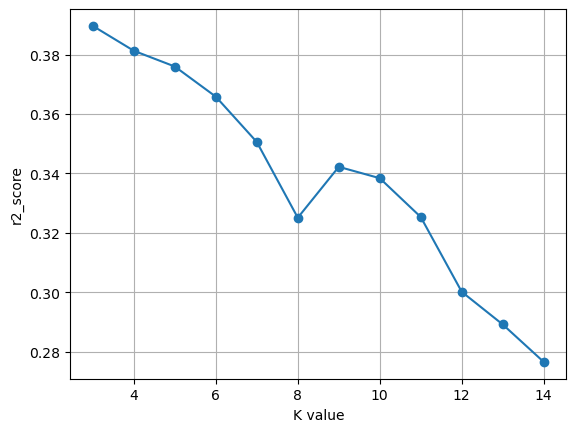

In [67]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('r2_score')
plt.grid()

In [68]:
Regressor=KNeighborsRegressor(n_neighbors=13,metric='euclidean')
knn=Regressor.fit(x_train,y_train)
y_prediction=Regressor.predict(x_test)

In [69]:
KNN_r2=r2_score(y_test,y_prediction)
KNN_r2

0.2892084620275789

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
   XGBoost
</h1>

In [70]:
model_xgb=XGBRegressor()

In [71]:
model_xgb=model_xgb.fit(x_train,y_train)

In [72]:
y_xgb=model_xgb.predict(x_test)

In [73]:
r2_xgb=r2_score(y_test,y_xgb)
r2_xgb

0.29438587820355233

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
   CatBoost
</h1>

In [74]:
model_cat=CatBoostRegressor(verbose=0)

In [75]:
model_cat=model_cat.fit(x_train,y_train)

In [76]:
y_cat=model_cat.predict(x_test)

In [77]:
r2_cat=r2_score(y_test,y_cat)
r2_cat

0.3747983298991192

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
   LightGBM
</h1>

In [78]:
model_lgb=lgbmodel.LGBMRegressor()

In [79]:
model_lgb=model_lgb.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 8
[LightGBM] [Info] Start training from score 10.777310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [80]:
y_lgb=model_lgb.predict(x_test)

C:\Users\GCE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [81]:
r2_lgb=r2_score(y_test,y_lgb)
r2_lgb

0.33329778912624586

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
   Gradient Boosting
</h1>

In [82]:
mode15_gdb=GradientBoostingRegressor(verbose=0)

In [83]:
model5_gdb=mode15_gdb.fit(x_train,y_train)

In [84]:
y_gdb=mode15_gdb.predict(x_test)

In [85]:
r2gdb=r2_score(y_test,y_gdb)
r2gdb

0.3382995698810879

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
   Tabulate
</h1>

In [86]:
table = [['Model', 'r2 score'], ['Linear Regression',r_score], ['Decision tree',r2_D], ['SVM(svr)',r2_svr],
['SVM(rgb)',r2_rbf], ['Ridge',r2],['Lasso',r2_sc1], ['KNN', KNN_r2], ['XGBoost',r2_xgb], ['CATBoost', r2_cat ]]
print(tabulate(table,headers= 'firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤═════════════╕
│ Model             │    r2 score │
╞═══════════════════╪═════════════╡
│ Linear Regression │  0.437665   │
├───────────────────┼─────────────┤
│ Decision tree     │  0.140226   │
├───────────────────┼─────────────┤
│ SVM(svr)          │  0.34425    │
├───────────────────┼─────────────┤
│ SVM(rgb)          │ -0.00717134 │
├───────────────────┼─────────────┤
│ Ridge             │  0.276609   │
├───────────────────┼─────────────┤
│ Lasso             │  0.436413   │
├───────────────────┼─────────────┤
│ KNN               │  0.289208   │
├───────────────────┼─────────────┤
│ XGBoost           │  0.294386   │
├───────────────────┼─────────────┤
│ CATBoost          │  0.374798   │
╘═══════════════════╧═════════════╛


<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
   Hyper Parameter Tuning
</h1>

In [87]:
from sklearn.model_selection import GridSearchCV
# Define a range of alpha values to search
param_grid = {
    'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-5, 1e-6],
    'selection': ['cyclic', 'random']
}

grid_search = GridSearchCV(lasso, param_grid, cv=5)
# Fit the model
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")



best_lasso = grid_search.best_estimator_
score = best_lasso.score(x_test, y_test)
print(f"Test R^2 score: {score}")

Best hyperparameters: {'alpha': 1e-06, 'fit_intercept': True, 'max_iter': 10000, 'selection': 'random', 'tol': 0.0001}
Test R^2 score: 0.4378112569607706


In [88]:
lasso_hy= Lasso(
    alpha=1e-06,                
    fit_intercept=True,       
    max_iter=5000,
    selection='random',
    tol=0.0001                 
)

In [89]:
lasso_hy.fit(x_train, y_train)

Lasso(alpha=1e-06, max_iter=5000, selection='random')

In [90]:
y_pred_hy= lasso_hy.predict(x_test)

In [91]:
r2_hy=r2_score(y_test,y_pred_hy)
r2_hy

0.4376433599632248

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;">
   Prediction
</h1>

In [92]:
new_data=[[-1.172620,-1.193106,-0.970166,-0.346366,1.520477,1.939438,-0.026560,-1.722715]]

In [93]:
mdl=model_xgb.predict(new_data)
mdl

array([37.630783], dtype=float32)